In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.chdir("../")

greeeen = pd.read_csv("./csv/GReeeeN_20231119.csv", index_col=0, header=0)

RATE_A = "rate_A"
RATE_S = "rate_S"

# 単語の一致率

In [2]:
wmr = pd.concat(
    [greeeen, pd.read_csv("./csv/GReeeeN_word_matched_rate_20231119.csv", index_col=0, header=0)],
    axis=1
).dropna(subset=["denominator_A"])

wmr[RATE_A] = wmr.numerator_A / wmr.denominator_A
wmr[RATE_S] = wmr.numerator_S / wmr.denominator_S

x_max_wmr = wmr[RATE_A].max()
x_min_wmr = wmr[RATE_A].min()
y_max_wmr = wmr[RATE_S].max()
y_min_wmr = wmr[RATE_S].min()

xy_max_wmr = max(x_max_wmr, y_max_wmr) + 0.05
xy_min_wmr = min(x_min_wmr, y_min_wmr) - 0.05

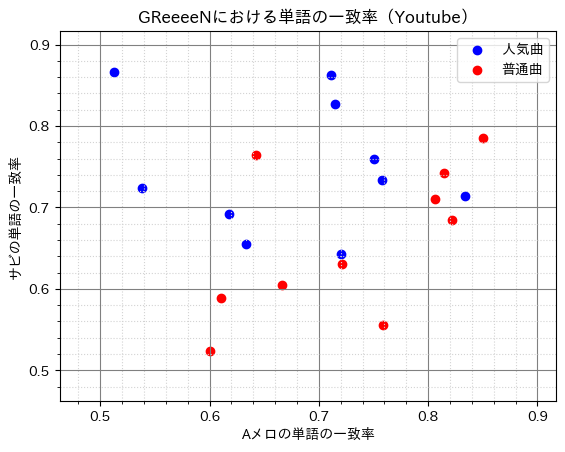

In [3]:
sort_by_youtube = wmr.dropna(subset=["youtube_url"]).sort_values("youtube_play_times", ascending=False)
center = len(sort_by_youtube) // 2
pop_youtube = sort_by_youtube[:center]
unpop_youtube = sort_by_youtube[center:]

plt.scatter(x=RATE_A, y=RATE_S, data=pop_youtube, color='blue', label='人気曲')
plt.scatter(x=RATE_A, y=RATE_S, data=unpop_youtube, color='red', label='普通曲')

plt.title("GReeeeNにおける単語の一致率（Youtube）")
plt.xlabel("Aメロの単語の一致率")
plt.ylabel("サビの単語の一致率")
plt.legend()
plt.xlim(xy_min_wmr, xy_max_wmr)
plt.ylim(xy_min_wmr, xy_max_wmr)
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

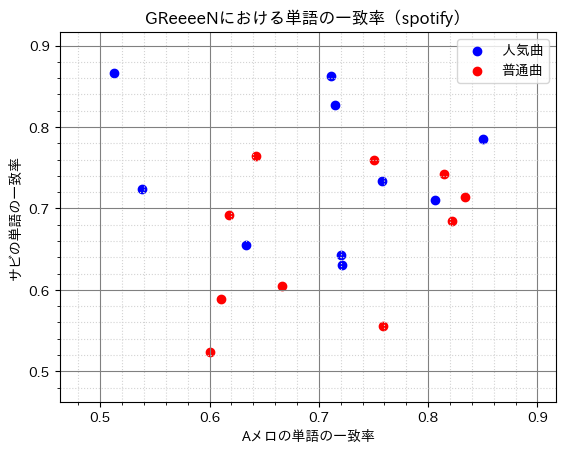

In [4]:
sort_by_spotify = wmr.dropna(subset=["spotify_id"]).sort_values("spotify_popularity", ascending=False)
center = len(sort_by_spotify) // 2
pop_spotify = sort_by_spotify[:center]
unpop_spotify = sort_by_spotify[center:]

plt.scatter(x=RATE_A, y=RATE_S, data=pop_spotify, color='blue', label='人気曲')
plt.scatter(x=RATE_A, y=RATE_S, data=unpop_spotify, color='red', label='普通曲')

plt.title("GReeeeNにおける単語の一致率（spotify）")
plt.xlabel("Aメロの単語の一致率")
plt.ylabel("サビの単語の一致率")
plt.legend()
plt.xlim(xy_min_wmr, xy_max_wmr)
plt.ylim(xy_min_wmr, xy_max_wmr)
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

# 木構造の類似度